# **Introduction**
The apps- offered in the Google Play are estimated to be almost  2.9 million applications as of March 2020. Lavanya Gupta, who was the creator of this data set was able to obtain details on almost 10,000 of these apps.

Per the author, the dataset was obtained through scraping the play store, which uses dynamic page loading. Dynamic page loading means that the store page displays the apps based on what Google knows about the user requesting the page, commonly known as user behavior. 


# **Data Set Content:**

I. Main Data Set (googleplaystore.csv)
This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:

**App Category: **Category of the app. This could be business, 
entertainment, healthcare, education etc., 
**Rating**: Rating done by users 1 out of 5; 5 - Highest; 1 - Lowest 
**Reviews**: Number of user reviews for each apps.
**Size**: Memory needed to install the apps.
**Installs:** Number of times app has been installed by the users.
**Type:** Free versus Paid app.
**Price:** App. Price
**Content Rating:** Intended Audience - Teens, Mature audience etc., 
**Genres:** The sub-category for each app. 
**Last Updated:** Release date of the most recent update for the app.
**Current Ver:** Current version of the app
**Android Ver:** The oldest version of Android OS supported by the app.

 
**II. Sentiment Analysis (googleplaystore_user_reviews.csv)**
 This file contains the result of the sentiment analysis conducted by the author. It has 64,295 rows of data with the following columns:
**App :** Name of the app.
**Translated_Review: **Either the original review in English, or a translated version if the orignal review is in another language.
**Sentiment:** The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.
**Sentiment_Polarity:** A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).
**Sentiment_Subjectivity:** A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, 
 and higher values indicate the review is based on personal or public opinions or judgements.




**Analytic Questions:**

Based on the dataset in place, we should be able to answer the following questions:

1. Find the most reviewed apps? And which three have the highest rating?
2. Does these apps vary by rating, pricing, and the ratio of reviews-to-installs?
3. Is there a difference in the reviews for paid and free apps?

In [1]:
#Mounting Google Drive into Collobaratory
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


apps_rep = pd.read_csv('gdrive/My Drive/googleplaystore.csv')

apps_rep.head(5)
#rev_app.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Though the author obtained 10,000 rows of data, the rating and reviews are not mandatory for users. Hence, there is a possibility of some missing data. Let's find how many missing values are there in each column:



In [0]:
# Header
print ("Missing Values"+"\n"+"-"*14)

# Print sum of null values per column
apps_rep.isnull().sum()

Missing Values
--------------


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We can infer from the above result, we have a decent dataset except the fact that are some missing values for Rating column. In order to answer our first questionn, which is heavily relied on user ratings. And those rows will be removed from the dataset.  


In [0]:
# Sort the original dataset by number of installs to see most popular apps first
apps_rep = apps_rep.sort_values(by="Installs", ascending=False)
apps_rep.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
420,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17714850,40M,"500,000,000+",Free,0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
474,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 26, 2018",Varies with device,Varies with device
3767,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device
3574,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,"May 23, 2018",Varies with device,Varies with device


As you can see from the above resultant set, the app "Life made Wi-Fi" is on the top but again its not based on the number of installs. And it clearly shows there is an error in data entry which attributed to this error. So, its better to remove the erroneous records. Before deleting them, we should also make sure that rows exist with 0 installs as well.

In [0]:
# Re-sort the data in ascending order to show least installed apps first
apps_rep = apps_rep.sort_values(by="Installs")
apps_rep.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device
9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56M,0+,Paid,$3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up
9719,EP Cook Book,MEDICAL,NaN,0,3.2M,0+,Paid,$200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0+,Paid,$154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
8081,CX Network,BUSINESS,NaN,0,10M,0+,Free,0,Everyone,Business,"August 6, 2018",1.3.1,4.1 and up


This is good news, no erroneous rows exist below 0 for the Installs column. Therefore all we have to do is delete that one erroneous row. So far now we will delete from:

Rows:

That erroneous row, with an index number of 10472. All rows with missing - or 
NaN- values in the Rating column.

Columns:

1. Size
2. Current Ver
3. Android Ver

In [0]:
# Get indexes of rows with NaN values for Rating column
nan_rows = list(apps_rep[apps_rep["Rating"].isna()].index)

# Add the index of the erroneous row
nan_rows.append(10472)

# Remove all rows with missing values
apps_rep = apps_rep.drop(nan_rows, axis=0)

# Remove unusable columns
apps_rep = apps_rep.drop(columns=["Size", "Current Ver","Android Ver"])

# Re-sort the data in descending order
apps_rep = apps_rep.sort_values(by="Installs", ascending=False)

Having done initial cleaning of data, now we proceed to answer the first question in this document:

In [0]:
1. Find the most reviewed apps? And which three have the highest rating?
It is logical to assume the most installed apps have the most reviews.
 As mentioned above, the number of installs for each application is not an actual number, but a group or level of installs this app has reached (example: 50 million and up). 
 Therefore we will call them bins throughout this document.  Let us plot these bins of Installs that we have in our dataset:

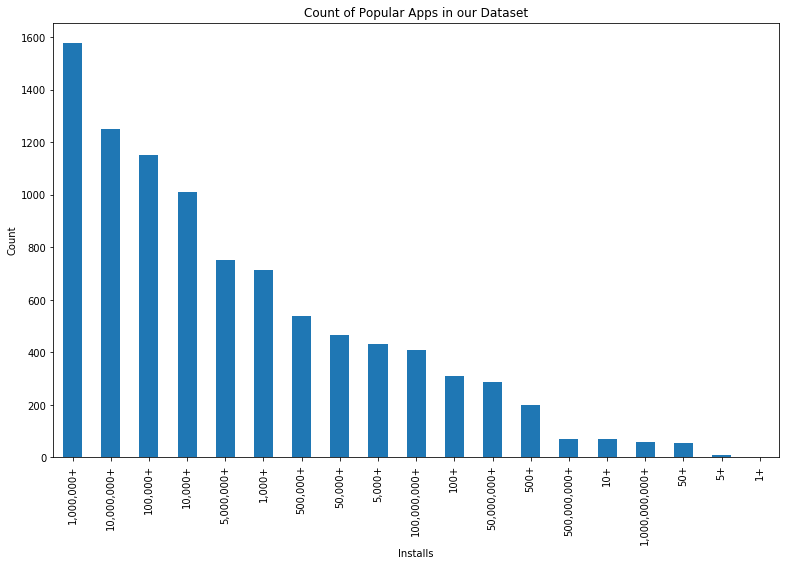

In [0]:

# Generate a series containing count of apps with each bin of number of installs

# Plot each bin of installs with its frequency/occurrence/count in the dataset
plt.figure(figsize=(13,8))
apps_rep["Installs"].value_counts().plot(kind='bar')
plt.title("Count of Popular Apps in our Dataset")
plt.ylabel("Count")
plt.xlabel("Installs")
plt.show()

Many apps in our dataset have been installed over a million times, and over 10 million times resepectively. It only makes sense to compare apps that are in the same bin to each other in terms of reviews and ratings. However, this leaves us with about 20 bins, with many of these apps not being necessarily that popular. To get a better focus on popular apps, I will choose the top 10 bins for this analysis. Which bins are in the top 10?



In [0]:
# Get Unique values of all bins in the Installs column
top_10 = np.unique(apps_rep["Installs"])

# Sort the values by length and return the longest 10 values
top_10 = (sorted(top_10,key=len,reverse=True))[:10]

print(top_10)
del top_10

['1,000,000,000+', '100,000,000+', '500,000,000+', '10,000,000+', '50,000,000+', '1,000,000+', '5,000,000+', '100,000+', '500,000+', '10,000+']



The least known apps in our list of top 10 bins seem to be the ones with more than 10,000 installs. However, the sorting order is according to the length (len) of string values, which is why we see the 100 million+ value coming before the 500 million+. Since we have sliced the list to contain only the top 10, we can see that the last value is 10,000+, where it should be 50,000+. This will be easy to deal with after parsing those values to integers.

Anything below 50,000 installs will be removed from consideration in answering our questions. The next step is to parse column bins into integer numbers so we can select rows with only those bins in a Pythonic way:

In [0]:
# Remove "+" and "," from Installs column values & Put new values in a variable
installs = [np.int(i.replace("+", "").replace(",","")) for i in apps_rep["Installs"]]

# Replace the installs column with the new integer values
apps_rep["Installs"] = [i for i in installs]

del installs

Now to the final step in finalizing a dataframe that has the necessary data to answer the first question, selecting rows that belong in the top 10 bins:

In [0]:
# A new dataframe containing rows in top 10 bins
top_10_df = apps_rep[apps_rep["Installs"] >= 50000]

# How much does this data represent of the original data?
print (str(round(len(top_10_df)/len(apps_rep)*100,0))+"%")

70.0%


In [0]:

# Parse review column values to integers
top_10_df["Reviews"] = [int(value) for value in top_10_df["Reviews"]]

# Add a new column containing review ratios
top_10_df["ReviewRatio"] = top_10_df["Reviews"]/top_10_df["Installs"]

Let's take a look at how the review ratios look for our top 10 bins. For each bin, we will take the app with the highest ReviewRatio:

In [0]:
# A dataframe to contain the most reviewed app from each bin:
most_reviewed = pd.DataFrame()

# Get the most reviewed app from each bin and add it to the most_reviewed dataframe
for bins in np.unique(top_10_df["Installs"]):
    top_row = top_10_df[top_10_df["Installs"] == bins]
    top_row = top_row.sort_values(by="ReviewRatio", ascending=False)
    top_row = top_row.head(1)
    most_reviewed = most_reviewed.append(top_row)

# Clear this dataframe of irrelevant columns for enhanced visibility
most_reviewed = most_reviewed.drop(columns=["Category","Type","Price","Content Rating","Genres","Last Updated"])
most_reviewed

,App,Rating,Reviews,Installs,ReviewRatio
6181,Shadow Fight 2 Special Edition,4.5,10440,50000,0.208800
9627,ai.type keyboard Plus + Emoji,4.5,57076,100000,0.570760
7766,CR & CoC Private Server - Clash Barbarians PRO,4.6,167974,500000,0.335948
10809,Castle Clash: RPG War and Strategy FR,4.7,376223,1000000,0.376223
4242,"Fame Boom for Real Followers, Likes",4.7,896118,5000000,0.179224
1888,Homescapes,4.6,3093932,10000000,0.309393
6551,Boom Beach,4.5,5591653,50000000,0.111833
1879,Clash of Clans,4.6,44893888,100000000,0.448939
4005,Clean Master- Space Cleaner & Antivirus,4.7,42916526,500000000,0.085833
2544,Facebook,4.1,78158306,1000000000,0.078158


The most reviewed app from each bin of installs. Being the most reviewed does not mean the highest rated, as in the Facebook app's case, but it certainly gives more credibility to the rating.

Now to the second part of our question, what are the top 3 rated apps from these top 10?

In [0]:

# Sort by rating descending and get the top 3
highest_rated = most_reviewed.sort_values(by="Rating", ascending=False).head(3)
highest_rated

,App,Rating,Reviews,Installs,ReviewRatio
10809,Castle Clash: RPG War and Strategy FR,4.7,376223,1000000,0.376223
4242,"Fame Boom for Real Followers, Likes",4.7,896118,5000000,0.179224
4005,Clean Master- Space Cleaner & Antivirus,4.7,42916526,500000000,0.085833


**Does these apps vary by rating, pricing, and the ratio of reviews-to-installs?**


In terms of rating, the top 3 apps tie on 4.7 out of 5.0!

**A. Rating**
We have seen that apps with the highest review ratios for the top 10 bins had maximum ratings of 4.7 out of 5, and a minimum of 4.1, but that is only for apps with the highest review ratios.

What about other apps in the top 10 bins? To have a clearer idea, let's plot the rating column from our dataset:

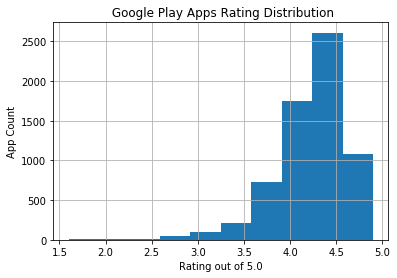

In [0]:

#Plot a histogram from the Rating column
top_10_df["Rating"].hist()
plt.title(" Google Play Apps Rating Distribution")
plt.ylabel("App Count")
plt.xlabel("Rating out of 5.0")
plt.show()

Over 2500 of the apps in the top 10 bins have a rating of over 4.2 to little over 4.5, possibly 4.6. And almost 1000 apps have been rated higher than that. To get our numbers right, let's see a quick descriptive summary of ratings:

In [0]:
top_10_df["Rating"].describe()

count    6564.000000
mean        4.224680
std         0.384961
min         1.600000
25%         4.100000
50%         4.300000
75%         4.500000
max         4.900000
Name: Rating, dtype: float64

In our previous question, the most reviewed apps scored maximum ratings of 4.7. We see here that other apps in the top 10 bins do have higher ratings, how many of them are there?

In [0]:

len(top_10_df[top_10_df["Rating"] > 4.7])

129


We have 129 apps with ratings higher than 4.7. Let's take a look at the top 5, sorted descending by Rating and Review Ratio:

In [0]:
top_10_df[top_10_df["Rating"] > 4.7].sort_values(by=["Rating","ReviewRatio"],ascending=False).head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,ReviewRatio
1833,The Room: Old Sins,GAME,4.9,21119,100000,Paid,$4.99,Everyone,Puzzle,"April 18, 2018",0.211190
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,1000000,Free,0,Everyone,Auto & Vehicles,"July 15, 2018",0.197136
10254,FC Porto,SPORTS,4.9,15883,100000,Free,0,Everyone,Sports,"June 19, 2018",0.158830
712,"Learn Japanese, Korean, Chinese Offline & Free",EDUCATION,4.9,133136,1000000,Free,0,Everyone,Education;Education,"July 20, 2018",0.133136
4332,EXO-L Amino for EXO Fans,SOCIAL,4.9,5677,50000,Free,0,Teen,Social,"July 13, 2018",0.113540


As you can see, the app **Room: Old Sins** seems like a great game to be played, especially since it is a paid app, costing $4.99, and still scoring a 4.9 out of 5. The second app Tickets + PDA 2018 Exam is for the PDA proficiency test, a test for engineers working high strain dynamic foundations. FC Porto is a Portuguese soccer team, for which the ratings may have been biased due to fan bias towards their favorite sports team.

The fourth app on the list, Learn Japanese, Korean, Chinese Offline & Free, seems to have done a great job educating users on these 3 languages, given that many other apps do require an internet connection. And the last application on the list is meant for fans of a Kpop group called Exo, again for which fans may have rated based on bias or love for content they can surely find elsewhere.


**B. Price**
Many apps in the Google Play store are for free. Still, let's take a look at how app pricing looks in general:

In [0]:
# Function to remove the $ prefix and parse price values to floats
def usd_2_float(value):
    if value == "0":
        return 0
    return float(value[1:])

# Call function on the Price column values
top_10_df["Price"] = [usd_2_float(value) for value in top_10_df["Price"]]

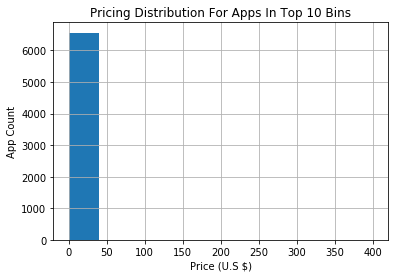

In [0]:
#First, the paid_apps variable will contain ALL apps, even free ones
#Plot a histogram of the Price column values
paid_apps = top_10_df["Price"]
paid_apps.hist()
plt.title("Pricing Distribution For Apps In Top 10 Bins")
plt.ylabel("App Count")
plt.xlabel("Price (U.S $)")
plt.show()


This plot shows that paid apps in the top 10 bins mostly cost less than $50, but nothing else. Let's see if there are outliers to this range?

What interests me in finding out this answer is knowing what kind of apps cost more than $50 USD AND were downloaded over 50,000 times at least? They might either be something of high value to many users, or an outlier with a very interesting reason to land in the top 10 bins:

In [0]:
#Pick apps with a price higher than zero
paid_apps = top_10_df[top_10_df["Price"] > 0]

#Pick apps with a price higher than $50
paid_apps[paid_apps["Price"] > 50]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,ReviewRatio
5356,I Am Rich Premium,FINANCE,4.1,1867,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",0.03734
5351,I am rich,LIFESTYLE,3.8,3547,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",0.03547



After looking these apps up on their Google Play page, it turns out their developer kept changing prices  with no other use of real value. This may explain people buying or installing these apps at low prices, maybe knowing these apps rise in price and they can use that information later to brag about it. 

Now I will get back to most paid apps and see how they range, this time limiting the price to something a little less than $40:

Text(0.5, 0, 'Price (U.S $)')

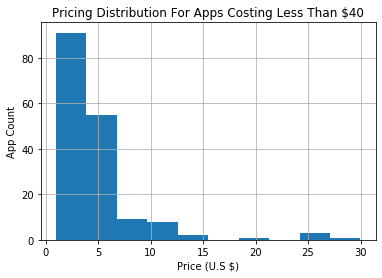

In [0]:
paid_apps[paid_apps["Price"]<40]["Price"].hist()
plt.title("Pricing Distribution For Apps Costing Less Than $40")
plt.ylabel("App Count")
plt.xlabel("Price (U.S $)")


Most apps cost less than \$5 (or even \$3, estimating through visuals). As would usually be expected, the amount of apps that cost more than that significantly decrease as we go up through the pricing, and two noticeable gaps can be seen between about \$16 to almost \$23 for apps in the top 10 bins.

The competition in app development is at its top at the moment, with many alternatives developed to almost every app and are only based on human creativity plus the ability to code, lowering entry barriers for more competition. Therefore, pricing an app significantly higher than the market will certainly require significant, sustainable competitive advantage.

In [0]:
print("$ {}".format(paid_apps["Price"].min()))

$ 0.99



**C. Review Ratio**
Our choice of only the top 10 bins is most suitable for exploring the ratio of reviews-to-installs, since apps in lower bins can be biased either by fake reviews, an individual developer's family and friends, or other factors. First, let's look at apps with review ratios where reviews surpass the amount of downloads:


In [0]:
top_10_df[top_10_df["ReviewRatio"] > 1]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,ReviewRatio


No apps in the top 10 bins have review ratios over 1, even though that could have been the case since a hypothetical app in the 50,000 bin could have actual amount of installs of 52,000 with 51,000 reviews, which in the case of bins is counted as 51,000 reviews over 50,000 (the bin amount, not the actual amount). However, that is clearly not the case in the real world as we have seen in this dataset.

Knowing that real-world reviews usually do not come close to the amount of installs, how does the distribution for the review ratio look like for the top 10 bins?

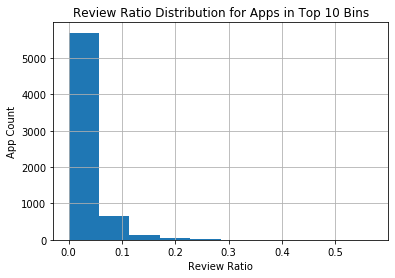

In [0]:
top_10_df["ReviewRatio"].hist()
plt.title("Review Ratio Distribution for Apps in Top 10 Bins")
plt.xlabel("Review Ratio")
plt.ylabel("App Count")
plt.show()


So, most review ratios are less than 0.1 of the amount of installs, and the highest of them seem to approach 0.3, all judged visually. Let's take a look at the actual numbers, this time using percentiles:

In [0]:
#Print percentiles at the borders of 1st, 2nd, and 3rd standard deviations, along with the max value
print("68th: {}".format(round(np.percentile(top_10_df["ReviewRatio"], 68),4)))
print("95th: {}".format(round(np.percentile(top_10_df["ReviewRatio"], 95),4)))
print("99th: {}".format(round(np.percentile(top_10_df["ReviewRatio"], 99),4)))
print("Max: {}".format(max(top_10_df["ReviewRatio"])))

68th: 0.0305
95th: 0.0972
99th: 0.1906
Max: 0.57076


The maximum point is a unique outlier, especially given the jump from 0.19 to 0.57, which is longer than the range for values below the 99th percentiles! For this purpose, let's explore the ratios depending on what we just found here:

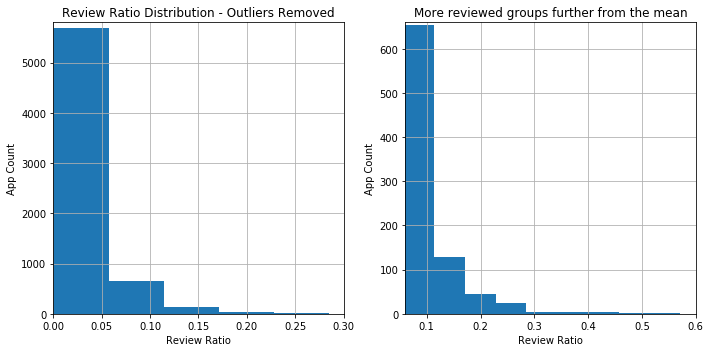

In [0]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
top_10_df["ReviewRatio"].hist()
plt.title("Review Ratio Distribution - Outliers Removed")
plt.xlabel("Review Ratio")
plt.ylabel("App Count")
plt.xlim(0,0.3)
plt.ylim(0,5800)

plt.subplot(1, 2, 2)
top_10_df["ReviewRatio"].hist()
plt.title("More reviewed groups further from the mean")
plt.xlabel("Review Ratio")
plt.ylabel("App Count")
plt.xlim(0.06,0.6)
plt.ylim(0,660)

plt.tight_layout()
plt.show()


The first plot shows most review ratios with only the maximum value removed, so it contains more than 99% of the data. We can see that most apps get reviewed about 0.06 times as much as they get installed or less (image on the left), while a much smaller percentage of apps get the opportunity to get reviewed 0.25 times their number of installs.

The second plot is there to zoom in on groups of fewer count but higher reveiw ratio. The first thing seen here is that the second plot looks kind of similar to the first one, even though it clearly has different limitations for x and y ticks. This leads to a question, Is there a correlation between the number of installs and reviews?

In [0]:

top_10_df["Installs"].corr(top_10_df["Reviews"])

0.6367889269753074


A positive correlation of about 0.64 confirms that reviews do increase with the amount of installs, but not concurrently. While this number does explain how reviews grow with increased app installs, having a solid number of installs per app -versus the bins we have here- would give a more accurate correlation between the two.


**3. Do people review paid apps in the same way they review free apps?**



In [0]:
# Import the csv file
rev_app_data = pd.read_csv('gdrive/My Drive/googleplaystore_user_reviews.csv')
#sentiment_data = pd.read_csv(r"C:\Users\Mohammad's Pc\Documents\Thinkful\7.11 Capstone 1 Analytic Report and Research Proposal\google-play-store-apps\googleplaystore_user_reviews.csv")

# Drop null values
rev_app_data = rev_app_data.dropna()
rev_app_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In order to compare free and paid apps, referred to here as Type, we need to get these types from the dataframe we used above, app_data.

Some of the apps included in the sentiment_data dataframe are not in the app_data dataframe, and therefore I will perform an inner join to add values from the Type column where both dataframes have the same app names in the App columns:

In [0]:
# Take a slice of the original dataset containing app name and type, and merge it with matching apps in this dataset
rev_app_data = pd.merge(rev_app_data, apps_rep[["App","Type"]] , how='inner', on="App")

# Drop null values from sentiment data
rev_app_data = rev_app_data.dropna()

rev_app_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Type
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,Free
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,Free
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,Free



Now that we have our dataframe containing the data we need to answer the analysis, let's see how many apps of each type we have:

In [0]:
# Generate counts of each unique values and print them
(values,counts)= np.unique(rev_app_data["Type"], return_counts=True)

for index in range(len(values)):
    print("{}: {}".format(values[index],counts[index]))

Free: 71823
Paid: 782


The sample size of free apps is close to 90 times the size of paid ones. This would give us the expectation that the statistics we are about to pull for free apps can be generalized of the population of free apps with more confidence than in the case of paid apps.

What I can do before comparing equal sample sizes is calculate the percentage of positive, neutral, and negative reviews for each dataset, which I will do right after creating their respective dataframes:

In [0]:
# A dataframe for each app type
free_apps = rev_app_data[rev_app_data["Type"] == "Free"]
paid_apps = rev_app_data[rev_app_data["Type"] == "Paid"]

In [0]:

# Return normalized values (percentages) of each value's occurrence & display them
print("Free Apps - Sentiment Percentage \n"+"-"*30+"\n{}\n\n".format(free_apps['Sentiment'].value_counts(normalize=True) * 100))
print("Paid Apps - Sentiment Percentage \n"+"-"*30+"\n{}".format(paid_apps['Sentiment'].value_counts(normalize=True) * 100))

Free Apps - Sentiment Percentage 
------------------------------
Positive    63.446250
Negative    25.089456
Neutral     11.464294
Name: Sentiment, dtype: float64


Paid Apps - Sentiment Percentage 
------------------------------
Positive    80.051151
Negative    14.578005
Neutral      5.370844
Name: Sentiment, dtype: float64


The percentage of positive sentiments in paid apps is significantly higher than that of free apps. This can be due to several reasons, the most visible of which are that many paid apps have some kind of advantage that many free apps do not, such as providing a service that company x is known for, or executing a process based on proprietary technology. With that in mind, such apps usually have more support, including more frequent security and user interface updates, which results in higher user statisfaction. Another reason may be the notion of having invested an amount of money into this app, and therefore a user may reinforce their satisfaction with this investment by providing a positive review.

Again, confidence in these percentages is higher for free apps than paid apps. If a paid apps sample of size equal to that of free apps was provided, the number may converge to a lower or a higher value.

When creating dataframes for each data type, indexes were moved along other data from the original dataframe, resulting in an index of unorganized integers. Due to the huge inequality of the count of free apps versus paid apps, I will be using index names to pick a random sample from free apps in order to perform head-to-head comparison. This calls for resetting the index for each of these dataframes:

In [0]:
# Make random, consistent choice of rows from free apps
np.random.seed(777)

# Reset index, then drop the old index column when it is moved to the right as a new column
paid_apps = paid_apps.reset_index().drop(columns=["index"])
free_apps = free_apps.reset_index().drop(columns=["index"])

# Generate a list of random indexes applicable to free_apps
random_indexes = np.random.choice(len(free_apps)-1, len(paid_apps), replace=False)

# Shorten free_apps to the same size of paid_apps & using a random selection
free_apps = free_apps.iloc[random_indexes]

# Reset index of free_apps
free_apps = free_apps.reset_index().drop(columns=["index"])


len(free_apps)

782

Great, now we have two samples of equal size for both app types, which will allow for better comparison of sentiments. I move on to plotting counts of sentiments in each app type:

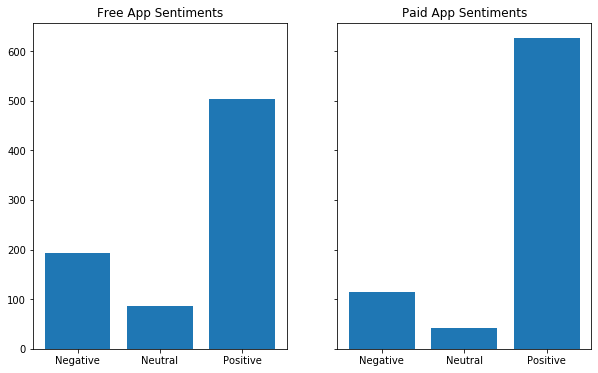

In [0]:
# Generate values & counts for Sentiment columns in our dataframes & put them in dictionaries
val_ct_free = np.unique(free_apps['Sentiment'],return_counts=True)
free_data = {value: count for value, count in zip(val_ct_free[0],val_ct_free[1])}
val_ct_paid = np.unique(paid_apps['Sentiment'],return_counts=True)
paid_data = {value: count for value, count in zip(val_ct_paid[0],val_ct_paid[1])}


# Put values and counts each in a different variable for use in plots, taken from dictionaries
free_names = list(free_data.keys())
free_values = list(free_data.values())
paid_names = list(paid_data.keys())
paid_values = list(paid_data.values())


# Create a figure containing plots for each app type, sharing the y-axis for comparison
fig, axs = plt.subplots(1, 2, figsize=(10, 6),sharey=True)
axs[0].bar(free_names, free_values)
axs[0].set_title("Free App Sentiments")
axs[1].bar(paid_names, paid_values)
axs[1].set_title("Paid App Sentiments")
plt.show()

After we have taken a sample of free apps of equal size to paid apps, the plots show us where the difference in positive sentiments is distributed; free apps have more negative and neutral reviews, indicating higher variance of sentiments for free apps.



Conclusion:
1. For a broader analysis, the dataset could've contained some of key information like user behaviors, and their browsing / buying habits , fav. contents etc.,  
2. Sample could have from various geographical locations and this would have helped us to understand what's popular where and why. 

Should any of the first 3 points of this proposal of further research be carried out, the sample size of paid apps would be larger and therefore an equally larger sample of free apps would help clear the result of our analysis. 